In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfr=pd.read_csv("./Wine-Quality-Dataset/winequality-red.csv", delimiter=";")
dfw=pd.read_csv("./Wine-Quality-Dataset/winequality-white.csv", delimiter=";")

In [3]:
dfr['hue'] = 0
dfw['hue'] = 1

In [4]:
df_wine = pd.concat([dfr, dfw], ignore_index=True)

<Axes: >

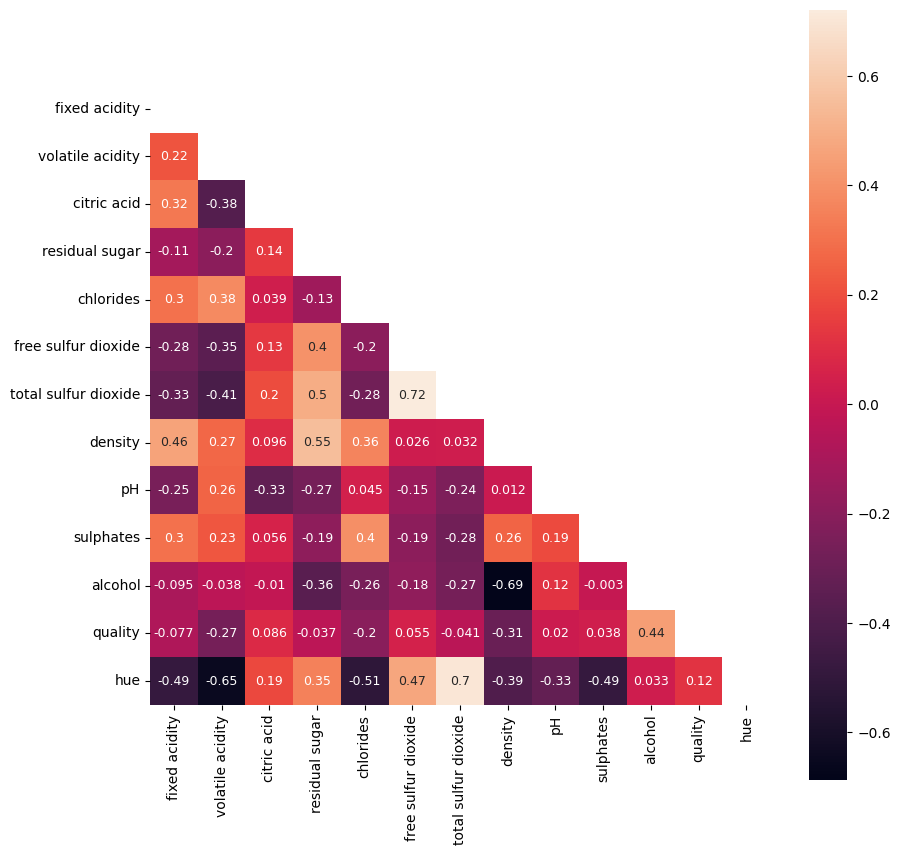

In [5]:
correlation = df_wine.corr()
# np.triu is a numpy function that takes 2d-numpy array as input and gives the upper triangle of the array
mask_triu = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True,
annot_kws={"size":9})

In [7]:
from sklearn.model_selection import train_test_split
X = df_wine[['total sulfur dioxide']]
y = df_wine[['hue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=42)

In [8]:
lr = LogisticRegression(random_state=0)

In [9]:
lr.fit(X_train, y_train)

/home/ali/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = lr.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9184149184149184

Confusion matrix: 
[[ 439  118]
 [  57 1531]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       557
           1       0.93      0.96      0.95      1588

    accuracy                           0.92      2145
   macro avg       0.91      0.88      0.89      2145
weighted avg       0.92      0.92      0.92      2145



In [11]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35,
'Accuracy in Train Group : {:.3f}'.format(train_accuracy),
'Accuracy in Test Group : {:.3f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group : 0.929
Accuracy in Test Group : 0.918
